In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
data2 = pd.read_csv("Multi_linear.txt",header = None)

In [25]:
data2.head()
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


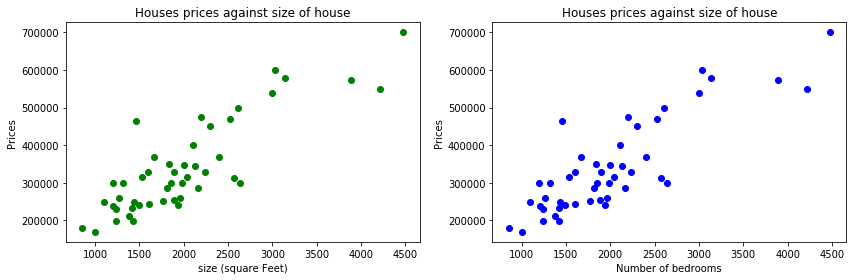

In [26]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)


axes[0].scatter(data2[0],data2[2],color="g")
axes[0].set_xlabel("size (square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("Houses prices against size of house")
axes[1].scatter(data2[0],data2[2],color="b")
axes[1].set_xlabel("Number of bedrooms")
axes[1].set_ylabel("Prices")
axes[1].set_title("Houses prices against size of house")

plt.tight_layout()


In [27]:
def featureNormalization(X):
    mean = np.mean(X,axis=0)
    print(mean)
# featureNormalization()
    std = np.std(X,axis=0)
    X_norm = (X - mean)/std
    return X_norm,mean,std


In [30]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [31]:
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2=data_n2[:,-1].reshape(m2,1)
theta2=np.zeros((3,1))


[2000.68085106    3.17021277]


In [34]:


def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history



In [35]:
computeCost(X2,y2,theta2)

65591548106.45744

In [36]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

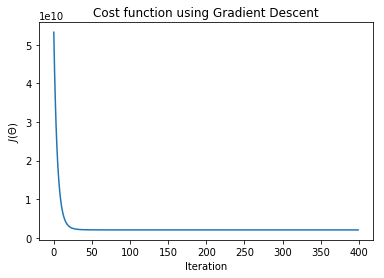

In [37]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [40]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]


In [41]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))



826.5
For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0
